#Frailty is physical weakness; lack of health or strength. Reduced grip strength in females correlated with higher frailty scores and vice versa. Hand grip strength can be quantified by measuring the amount of static force that the hand can squeeze around a dynamometer. The force has most commonly been measured in kilograms and pounds. The table below represents data from 10 female participants.
##The Height is measured in inches, Weight in pounds, Age in years, Grip strength in kilograms. Frailty is qualitative attribute indicated the presence or absence of the symptoms. Based on the following table, design the three stages of reproducible workflow, includes the work you can do and the folder structure in each stage (reference study case in chapter 3).

##Installing Tree to see folder structure

In [39]:
!apt-get install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


##Importing required libraries

In [40]:
#importing libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Defining the subfolders and the required respective subdirectories
subfolders = {
    "Frailty": ["Data_Raw", "Data_Clean", "Results"],
    "StudentsPerformance": ["Data_Raw", "Data_Clean", "Results"]
}

# Function to create directories
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print(f"Created: {path}")
    else:
        print(f"Already exists: {path}")

# Now iterating through each subfolder and its subdirectories
for subfolder, subdirs in subfolders.items():
    subfolder_path = os.path.join(main_folder, subfolder)
    create_directory(subfolder_path)
    for subdir in subdirs:
        subdir_path = os.path.join(subfolder_path, subdir)
        create_directory(subdir_path)

print("Folder structure setup complete!")


Already exists: /content/drive/My Drive/PSD assignment/Frailty
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Data_Raw
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Data_Clean
Already exists: /content/drive/My Drive/PSD assignment/Frailty/Results
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Raw
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Data_Clean
Already exists: /content/drive/My Drive/PSD assignment/StudentsPerformance/Results
Folder structure setup complete!


##Showing the folder structure

In [43]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    ├── Data_Raw
    └── Results

8 directories, 3 files


##Reading the raw data

In [44]:
#File path
file_path = "/content/drive/My Drive/PSD assignment/Frailty/Data_Raw/frailty_data.csv"

# Reading the CSV file where we have the frailty data
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


##Cleaning the data

In [45]:
# Check for missing values
print(df.isnull().sum())

Height           0
Weight           0
Age              0
Grip strength    0
Frailty          0
dtype: int64


In [46]:
# Creating a new column with sequential participant names
df["Participant Name"] = ["Participant_" + chr(65 + i) for i in range(len(df))]

# Displaying the first few rows to check the data
df.head()

,Height,Weight,Age,Grip strength,Frailty,Participant Name
0,65.8,112,30,30,N,Participant_A
1,71.5,136,19,31,N,Participant_B
2,69.4,153,45,29,N,Participant_C
3,68.2,142,22,28,Y,Participant_D
4,67.8,144,29,24,Y,Participant_E


In [47]:
#checking the column names
df.columns

Index(['Height', 'Weight', 'Age', 'Grip strength', 'Frailty',
       'Participant Name'],
      dtype='object')

## Convert Categorical to Numerical as frailty is a qulitative variable

In [48]:
df["Frailty"] = df["Frailty"].map({'Y': 1, 'N': 0})
df.head()

,Height,Weight,Age,Grip strength,Frailty,Participant Name
0,65.8,112,30,30,0,Participant_A
1,71.5,136,19,31,0,Participant_B
2,69.4,153,45,29,0,Participant_C
3,68.2,142,22,28,1,Participant_D
4,67.8,144,29,24,1,Participant_E


In [49]:
# Path of the folder where clean data is to be saved
save_path = "/content/drive/My Drive/PSD assignment/Frailty/Data_Clean/clean_data.csv"

# Save the cleaned dataframe
df.to_csv(save_path, index=False)

print("Cleaned data saved successfully at:", save_path)


Cleaned data saved successfully at: /content/drive/My Drive/PSD assignment/Frailty/Data_Clean/clean_data.csv


In [50]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    ├── Data_Raw
    └── Results

8 directories, 3 files


## Visualization of Data and storing the results in Results folder

<ipython-input-51-b3b1b6c6f52a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Frailty"], y=df["Grip strength"], palette="coolwarm")


Image saved successfully at: /content/drive/My Drive/PSD assignment/Frailty/Results/grip_strength_vs_frailty.png


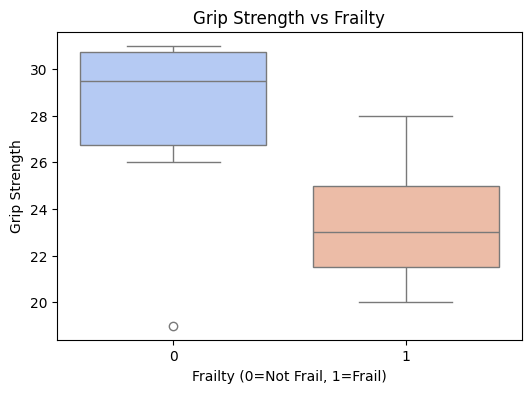

In [51]:
# Saving the image in the result folder path
image_path = "/content/drive/My Drive/PSD assignment/Frailty/Results/grip_strength_vs_frailty.png"

# Creating the plot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Frailty"], y=df["Grip strength"], palette="coolwarm")
plt.title("Grip Strength vs Frailty")
plt.xlabel("Frailty (0=Not Frail, 1=Frail)")
plt.ylabel("Grip Strength")

# Saving the image
plt.savefig(image_path, dpi=300, bbox_inches="tight")

print("Image saved successfully at:", image_path)


In [52]:
!tree "/content/drive/My Drive/PSD assignment"

/content/drive/My Drive/PSD assignment
├── Frailty
│   ├── Data_Clean
│   │   └── clean_data.csv
│   ├── Data_Raw
│   │   └── frailty_data.csv
│   └── Results
│       └── grip_strength_vs_frailty.png
└── StudentsPerformance
    ├── Data_Clean
    ├── Data_Raw
    └── Results

8 directories, 3 files
